# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

## Logistic Regression
Linear regression is used to predict values of quantities as a linear function of the input values. When predicting a discrete variable, such as whether a grid of pixel intensities represents 0 or 1, we need to classify the input values. Logistic regression is a simple classification algorithm for learning to make such decisions. It is a model that is used when the dependent variable is categorical. A few cases where logistic regression can be used are mentioned below:
- Image segmentation and categorization
- Geographic image recognition
- Handwriting recognition
- Determining whether a person is depressed based on the words of his social media posts
- Predicting the probability of a person voting for a candidate in an election

Logistic regression falls under supervised learning; it measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. Despite the name 'logistic regression', it is not used for machine learning regression problem where the task is to predict the real-valued output. It is a classification problem that is used to predict a binary outcome (1/0, -1/1, True/False) given a set of independent variables. Logistic regression is a bit similar to linear regression, or we can say it as a generalized linear model. In linear regression, we predict a real-valued output ' y' based on a weighted sum of input variables.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/RhPKYU1R/logistic.PNG "Linear")

$$ y = c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n}$$

Linear regression aims to estimate values for the model coefficients $c$, $w_{1}$, $w_{1}$, $w_{3}$...$w_{n}$ and fit the training data with minimal squared error and predict the output y.

Logistic regression does the same thing, but with one addition. The logistic regression model computes a weighted sum of the input variables similar to the linear regression, but it runs the result through a special
non-linear function, the logistic function or sigmoid function, to produce the output y. Here, the output is binary or in the form of 0/1 or -1/1.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/JDilmsrZ/logistic1.PNG "Logistic")


The sigmoid/logistic function is given by the following equation:

$$ y = logistic (c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n})$$
$$ y = 1/e^{-(c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n})}$$
$$ y = 1/e^{-x}$$

As you can see in the below graph, it is an S-shaped curve that gets closer to 1 as the input variable's value increases above 0 and gets closer to 0 as the input variable decreases below 0. The output of the sigmoid function is 0.5 when the input variable is 0.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/CZwY5Wru/sigmoid.PNG "Sigmoid")

Reference: https://blog.quantinsti.com/machine-learning-logistic-regression-python/

In this notebook, you will perform the following steps:


1. [Import data](#data)


2. [Logistic Regression Model](#model)


3. [Predict the Values](#predict)


4. [Plot the Result](#plot)
    
<a id='data'></a> 

## Import Data

We will use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank"> Scikit-Learn</a> library is to perform the logistic regression. 

We will use an Iris dataset which is already available in the Scikit-Learn library. This data sets consists of 2 different types of irises: Setosa, Versicolour as we can see in X variable.</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import linear_model and dataset from sklearn
from sklearn import linear_model, datasets
iris = datasets.load_iris()   

# Independent variables. We will only use the first two features/Columns.
X = iris.data[:, :2] 

# Dependent variable
Y = iris.target

<a id='model'></a> 

## Logistic Regression Model 
We will use the `LogisticRegression` function from `linear_model` to create a logistic regression model.

In [2]:
# Create an instance of LogisticRegression and fit the data
log_reg = linear_model.LogisticRegression(C=1e5)
log_reg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='predict'></a>
## Predict the Values
We will use the ravel function to input the 1-D array into the regression model. Before making the predictions, we will define the boundaries to classify the Iris into different plotting range.

In [3]:
# Step size in the mesh
h = .01 

# Create the decision boundary
# For that, we will assign a color to each Point in the mesh [x_min, x_max] [y_min, y_max]
# Take the endpoints of the X variable
x_min, x_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5 
# Take the endpoints of the Y variable
y_min, y_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5  

# Create a mesh using np.mesh function so that we can easily see the classified results under different mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [4]:
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 0, 0, 0])

<a id='plot'></a> 

## Plot the Result

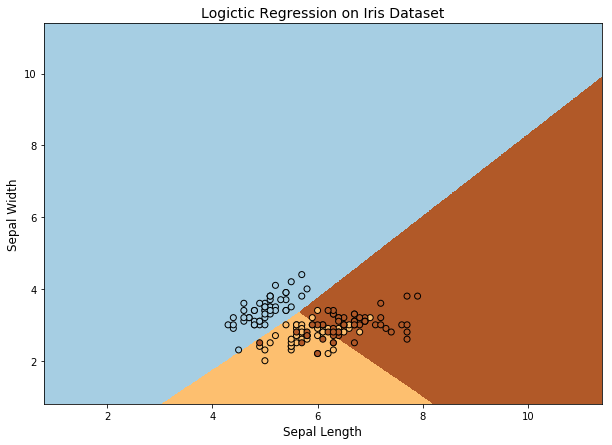

In [5]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('Logictic Regression on Iris Dataset', fontsize=14)

plt.show()

As you can see, the iris has been classified into different categories. We can use the Logistic Regression to classify different features under different categories but with the condition that the independent variable must have different categories. <br><br>